In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False


df = pd.read_csv('winequality-white.csv', sep=';')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [15]:
#As you can see from the quality column, this is not a binary classification problem – 
#so you’ll turn it into one. Let’s say the wine is Good if the quality is 7 or above, and Bad otherwise
df['quality'] = ['Good' if quality >= 7 else 'Bad' for quality in df['quality']]

TypeError: '>=' not supported between instances of 'str' and 'int'

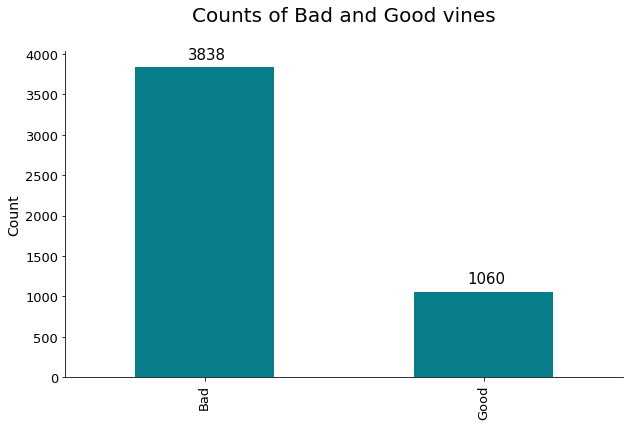

In [16]:
#Next, let’s visualize the target variable distribution.
ax = df['quality'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Counts of Bad and Good vines', size=20, pad=30)
ax.set_ylabel('Count', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 100, str(round(i.get_height(), 2)), fontsize=15)

### There are many more bad wines, meaning the model will learn to classify bad wines better. You could use oversampling/undersampling techniques to overcome this issue, but it’s beyond the scope for today.

In [17]:
#You can make a train/test split
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [18]:
!pip install xgboost

In [19]:
#You’ll train a couple of models and visualize precision-recall curves next.
#The snippet below shows you how to train logistic regression, decision tree, 
#random forests, and extreme gradient boosting models.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model_lr = LogisticRegression().fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_dt = DecisionTreeClassifier().fit(X_train, y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]

model_rf = RandomForestClassifier().fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

model_xg = XGBClassifier().fit(X_train, y_train)
probs_xg = model_xg.predict_proba(X_test)[:, 1]

C:\Users\ShaafAbdullah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[18:46:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ShaafAbdullah\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [20]:
#You can obtain the values for precision, recall, and AUC (Area Under the Curve) 
#for every model next. The only requirement is to remap the Good and Bad class names to 1 and 0,
from sklearn.metrics import auc, precision_recall_curve

y_test_int = y_test.replace({'Good': 1, 'Bad': 0})

baseline_model = sum(y_test_int == 1) / len(y_test_int)

precision_lr, recall_lr, _ = precision_recall_curve(y_test_int, probs_lr)
auc_lr = auc(recall_lr, precision_lr)

precision_dt, recall_dt, _ = precision_recall_curve(y_test_int, probs_dt)
auc_dt = auc(recall_dt, precision_dt)

precision_rf, recall_rf, _ = precision_recall_curve(y_test_int, probs_rf)
auc_rf = auc(recall_rf, precision_rf)

precision_xg, recall_xg, _ = precision_recall_curve(y_test_int, probs_xg)
auc_xg = auc(recall_xg, precision_xg)

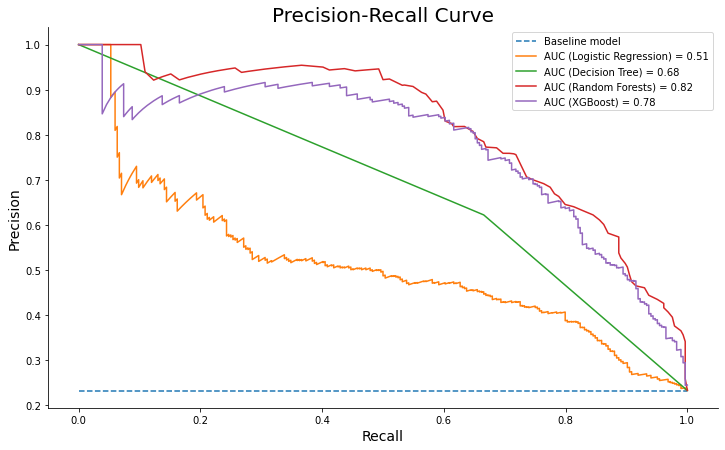

In [21]:
#Finally, you can visualize precision-recall curves
plt.figure(figsize=(12, 7))
plt.plot([0, 1], [baseline_model, baseline_model], linestyle='--', label='Baseline model')
plt.plot(recall_lr, precision_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(recall_dt, precision_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(recall_rf, precision_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(recall_xg, precision_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend();